In [5]:
from pathlib import Path
import pandas as pd
import igraph as ig
import leidenalg as la

In [6]:
data_dir = Path('.') / '..' / 'data'
publications_df = pd.read_csv(data_dir / 'publications.txt', sep='\t')
citations_df = pd.read_csv(data_dir / 'citations.txt', sep='\t')

In [7]:
publications_df.head(5)

,paper_id,authors,journal_title,pub_year,n_cits,n_refs,paper_title,abstract
0,1481577014,Jens Mani; Eva Juengel; Georg Bartsch; Hanns A...,Urologia Internationalis,2015,0,21,globalization in urology a bibliographical ana...,Introduction: Asian scientists have now increa...
1,2030392393,Apostolos P. Labanaris; Reinhard Kühn; Günter ...,Urologia Internationalis,2007,4,6,impact factors in urology,Introduction: The purpose of our analysis was...
2,2552017014,Colin W. Wrigley,Journal of Cereal Science,2016,0,1,the demise of black ink on white paper publishing,NaN
3,2078351468,S M Shafi; Mohammad Hanief Bhat,Vine,2014,0,23,performance and visibility of indian research ...,Purpose – This study aims to examine the perfo...
4,1587562017,V. Cavaller,Vine,2009,3,13,scientometrics and patent bibliometrics in rul...,Purpose – This article aims to show the applic...


In [8]:
citations_df.head(5)

,citing_paper_id,cited_paper_id
0,1894650058,2030764447
1,1888227864,2029902769
2,1888227864,2125450066
3,1888227864,2135336760
4,1888227864,2143083489


In [9]:
G = ig.Graph.DataFrame(edges=citations_df, directed=True,
                       vertices=publications_df)
components = G.clusters(mode=ig.WEAK)
H = components.giant()

In [10]:
print(H.summary())

IGRAPH DN-- 29219 216407 -- 
+ attr: abstract (v), authors (v), journal_title (v), n_cits (v), n_refs (v), name (v), paper_title (v), pub_year (v)


In [11]:
H_u = H.copy()
H_u.to_undirected()

In [20]:
clusters = H_u.community_leiden(resolution_parameter=1e-2)

In [21]:
import numpy as np
sizes = np.array(clusters.sizes())
size_rank = np.argsort(sizes)[::-1]
sizes[size_rank][:10]

array([630, 451, 440, 415, 363, 353, 326, 322, 320, 297])

In [35]:
H_sub = clusters.subgraph(size_rank[1])
sub_pubs = H_sub.get_vertex_dataframe()
print(f'Contains {H_sub.vcount()} nodes and {H_sub.ecount()} edges')
sub_pubs.sort_values('n_cits', ascending=False)[['authors', 'journal_title', 'pub_year', 'paper_title']].head(20)

Contains 451 nodes and 4958 edges


,authors,journal_title,pub_year,paper_title
vertex ID,,,,
139,Eugene Garfield,JAMA,2006,the history and meaning of the journal impact ...
131,David A. King,Nature,2004,the scientific impact of nations
15,Lutz Bornmann; Hans-Dieter Daniel,Journal of Documentation,2008,what do citation counts measure a review of st...
132,Diana Hicks; Ludo Waltman; Paul Wouters; Ismae...,Nature,2015,bibliometrics the leiden manifesto for researc...
90,Filippo Radicchi; Santo Fortunato; Claudio Cas...,Proceedings of the National Academy of Science...,2008,universality of citation distributions toward ...
232,Henk F. Moed,Journal of Informetrics,2010,measuring contextual citation impact of scient...
450,Wolfgang Glänzel; Henk F. Moed,Scientometrics,2002,journal impact measures in bibliometric research
69,Carl T. Bergstrom,College & Research Libraries News,2007,eigenfactor measuring the value and prestige o...
310,Borja González-Pereira; Félix Moya-Anegón; Vic...,Journal of Informetrics,2010,a new approach to the metric of journals scien...


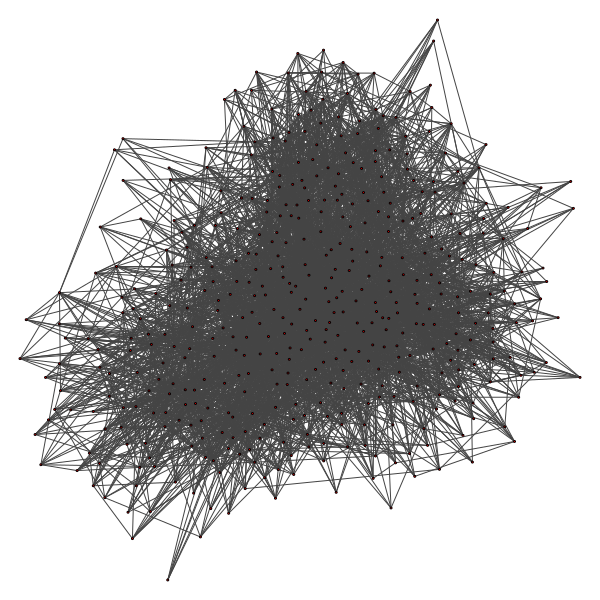

In [36]:
ig.plot(H_sub, vertex_size=2)